# Email Prompt
---

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?


Thank you,

---

The log information gathered used in this report was acquired from the Codeup cloud database server using Sequel Ace. It was then import to python using pandas.

---

| program_id | program name |
|-----------|-------------|
|1 | PHP Full Stack Web Development|
|2 | Java Full Stack Web Development|
|3 | Data Science |
|4 | Front End Web Development|

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
import os

import wrangle as w

## Wrangle

In [2]:
df = pd.read_csv('cohort_sql.csv')

In [3]:
df, df1 = w.wrangle_data(df)

In [4]:
df.shape, \
df1.shape

((1010775, 23), (889702, 24))

In [5]:
df.head(3)

,date,time,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,...,Friday,January,,,None,None,None,None,None,None
2018-01-26 09:56:02,2018-01-26,09:56:02,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,...,Friday,January,java-ii,None,None,None,None,None,None,None
2018-01-26 09:56:05,2018-01-26,09:56:05,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,...,Friday,January,java-ii,object-oriented-programming,None,None,None,None,None,None


In [6]:
df1.head(3)

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Friday,January,java-ii,None,None,None,None,None,None,None
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Friday,January,java-ii,object-oriented-programming,None,None,None,None,None,None
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Friday,January,slides,object_oriented_programming,None,None,None,None,None,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1010775 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 23 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1010775 non-null  object        
 1   time        1010775 non-null  object        
 2   user_id     1010775 non-null  int64         
 3   cohort_id   953385 non-null   float64       
 4   ip          1010775 non-null  object        
 5   name        953385 non-null   object        
 6   slack       953385 non-null   object        
 7   start_date  953385 non-null   datetime64[ns]
 8   end_date    953385 non-null   datetime64[ns]
 9   created_at  953385 non-null   datetime64[ns]
 10  updated_at  953385 non-null   datetime64[ns]
 11  program_id  953385 non-null   float64       
 12  hour        1010775 non-null  int64         
 13  weekday     1010775 non-null  object        
 14  month       1010775 non-null  object        
 15 

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889702 entries, 2018-01-26 09:56:02 to 2021-04-21 16:44:39
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        889702 non-null  object        
 1   time        889702 non-null  object        
 2   path        889700 non-null  object        
 3   user_id     889702 non-null  int64         
 4   cohort_id   839996 non-null  float64       
 5   ip          889702 non-null  object        
 6   name        839996 non-null  object        
 7   slack       839996 non-null  object        
 8   start_date  839996 non-null  datetime64[ns]
 9   end_date    839996 non-null  datetime64[ns]
 10  created_at  839996 non-null  datetime64[ns]
 11  updated_at  839996 non-null  datetime64[ns]
 12  program_id  839996 non-null  float64       
 13  hour        889702 non-null  int64         
 14  weekday     889702 non-null  object        
 15  month       88970

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

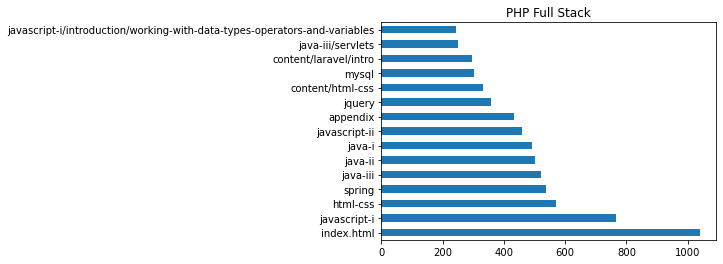

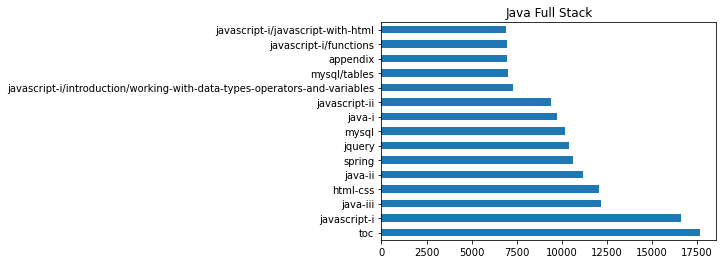

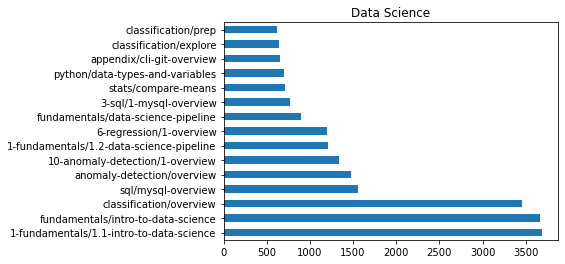

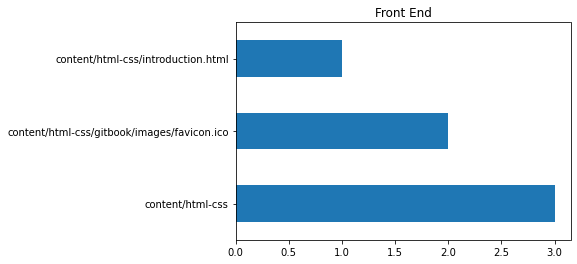

In [29]:
for program in [1, 2, 3, 4]:
    df1[(df1.program_id==program) & (df1.name != 'Staff')].path.value_counts().head(15).plot.barh()
    if program == 1:
        plt.title('PHP Full Stack')
    elif program == 2:
        plt.title('Java Full Stack')
    elif program == 3:
        plt.title('Data Science')
    else:
        plt.title('Front End')
    plt.show()

#### Takeaways:

Ignoring non-lessons like 'appendix' and 'toc' (table of contents):
- PHP:
    - laravel/intro
- Java:
    - javascript-i/introduction
- Data Science:
    - fundamentals/intro-to-data-science
- Front End
    - html-css/intro

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [39]:
# visualize PHP cohort paths
for cohort in df1[df1.program_id==1].cohort_id.dropna().unique():
    print(f'Cohort: {df1[(df1.program_id==1) & (df1.cohort_id==cohort)].name[1]}')
    print(df1[(df1.program_id==1) & (df1.cohort_id==cohort) & (df1.name != 'Staff')].path.value_counts())
    print()

Cohort: Hampton
java-iii                        59
appendix                        57
java-ii                         48
spring                          46
java-i                          46
                                ..
content/html-css/forms.html      1
appendix/slides                  1
javascript-i/bom-and-dom/dom     1
javascript-i/arrays              1
javascript-i/bom-and-dom         1
Name: path, Length: 274, dtype: int64

Cohort: Arches
javascript-i                                              310
html-css                                                  231
javascript-ii                                             222
spring                                                    215
java-ii                                                   200
                                                         ... 
appendix/further-reading/javascript/hoisting.html           1
slides                                                      1
content/php_iv/classes-and-objects-ii            

html-css                                                                     12
html-css/elements                                                            12
content/html-css                                                             11
html-css/introduction                                                        10
html-css/forms                                                                8
                                                                             ..
javascript-i/conditionals                                                     1
javascript-i/introduction/working-with-data-types-operators-and-variables     1
content/html-css/elements.html                                                1
html-css/css-i/box-model                                                      1
javascript-i/introduction/variables                                           1
Name: path, Length: 93, dtype: int64

Cohort: Franklin
javascript-ii/es6                          10
java-iii           

In [40]:
# visualize Java cohort paths
for cohort in df1[df1.program_id==2].cohort_id.dropna().unique():
    print(f'Cohort: {df1[(df1.program_id==2) & (df1.cohort_id==cohort)].name[1]}')
    print(df1[(df1.program_id==2) & (df1.cohort_id==cohort) & (df1.name != 'Staff')].path.value_counts())
    print()

Cohort: Teddy
java-iii                                                 783
spring                                                   782
mysql                                                    676
javascript-i                                             644
mkdocs/search_index.json                                 611
                                                        ... 
content/html-css/css-ii/gitbook/images/favicon.ico         1
1-fundamentals/project                                     1
sql/mysql-overview                                         1
content/appendix/angular/templating.html                   1
appendix/professional-development/job-search-workshop      1
Name: path, Length: 534, dtype: int64

Cohort: Sequoia
spring                                            373
spring/fundamentals/views                         213
javascript-i                                      212
spring/fundamentals/controllers                   191
html-css                                    

javascript-i                               958
html-css                                   836
toc                                        816
jquery                                     596
spring                                     562
                                          ... 
console-io                                   1
professional-development/cover-letter        1
introduction-to-java                         1
appendix/coding-challenges/professional      1
mysql/java-iii                               1
Name: path, Length: 283, dtype: int64

Cohort: Europa
toc                                                      1028
javascript-i                                              540
java-iii                                                  494
html-css/elements                                         457
mysql                                                     420
                                                         ... 
examples/javascript/jasmine-3.5.0.zip                    

In [42]:
# visualize Data Science cohort paths
for cohort in df1[df1.program_id==3].cohort_id.dropna().unique():
    print(f'Cohort: {df1[(df1.program_id==3) & (df1.cohort_id==cohort)].name[1]}')
    print(df1[(df1.program_id==3) & (df1.cohort_id==cohort) & (df1.name != 'Staff')].path.value_counts())
    print()

Cohort: Bayes
1-fundamentals/1.1-intro-to-data-science    1424
10-anomaly-detection/1-overview              679
6-regression/1-overview                      546
1-fundamentals/1.2-data-science-pipeline     402
5-stats/3-probability-distributions          344
                                            ... 
acquire-and-prep                               1
9-timeseries/6.1-parametric-modeling           1
regression/old_project                         1
classification/ensemble                        1
index.html                                     1
Name: path, Length: 489, dtype: int64

Cohort: Curie
1-fundamentals/1.1-intro-to-data-science    1022
6-regression/1-overview                      643
10-anomaly-detection/1-overview              612
3-sql/1-mysql-overview                       467
4-python/8.4.3-dataframes                    271
                                            ... 
appendix/open_data/www.census.gov              1
storytelling/create                            1
re

In [41]:
for cohort in df1[df1.program_id==4].cohort_id.dropna().unique():
        print(f'Cohort: {df1[(df1.program_id==4) & (df1.cohort_id==cohort)].name[1]}')
        print(df1[(df1.program_id==4) & (df1.cohort_id==cohort) & (df1.name != 'Staff')].path.value_counts())

Cohort: Apollo
content/html-css                               3
content/html-css/gitbook/images/favicon.ico    2
content/html-css/introduction.html             1
Name: path, dtype: int64


#### Takeaways:

Ignoring non-lessons like 'appendix' and 'toc' (table of contents):
- PHP:
    - Quincy spent more time looking at php iii material than other cohorts
- Java:
    - Pinnacles had more requests for java-ii material
- Data Science:
    - Florence spent more time reviewing SQL joins more than other cohorts
- Front End
    - Apollo is the only cohort included

### 3. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [43]:
##classes in 2020 and greater can only access their specific curriculum, we can use data after 2019 to pinpoint just exactly what student had access to  what 
webdev_list = df1[(df1['program_id'] != 3) & (df1.created_at.dt.year > 2019)].path.unique().tolist()

ds_list = df1[(df1['program_id'] == 3) & (df1.created_at.dt.year > 2019)].path.unique().tolist()

In [44]:
webdev_list[: 5]

['toc', 'html-css/introduction', 'html-css/elements', 'spring', 'html-css']

In [45]:
ds_list[: 5]

['login',
 '4-python/1-overview',
 '1-fundamentals/1.1-intro-to-data-science',
 '4-python/2-introduction-to-python',
 '3-sql/1-mysql-overview']

In [46]:
#look at common pages visited for both programs to ommit when filtering 
matching = []
for w in webdev_list:
    for d in ds_list:
        if w == d:
            matching.append(w)

In [48]:
matching[: 5]

['toc', 'spring', 'mysql', 'appendix', 'appendix/documentation']

In [63]:
# ds students who accessed webdev material
ds_in_web = df1.loc[(df1['program_id'] == 3) & (df1.path.isin(webdev_list)) & (~df1.path.isin(matching))]

In [64]:
# webdev students who accessed ds material
web_in_ds = df1.loc[(df1.program_id != 3) & (df1.path.isin(ds_list)) & (~df1.path.isin(matching))]

In [79]:
# shape of df holding instances of ds students accessing webdev info
ds_in_web[ds_in_web.created_at.dt.year < 2020].shape

(75, 24)

In [75]:
# df holding instances of ds students accessing webdev info before 2020
ds_in_web[ds_in_web.created_at.dt.year < 2020].head(3)

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-09-23 11:45:09,2019-09-23,11:45:09,java-iii,476,34.0,97.105.19.58,Bayes,#,2019-08-19,2020-01-30,...,Monday,September,java-iii,None,None,None,None,None,None,None
2019-09-25 19:30:42,2019-09-25,19:30:42,html-css,476,34.0,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,...,Wednesday,September,html-css,None,None,None,None,None,None,None
2019-09-25 19:30:44,2019-09-25,19:30:44,javascript-i,476,34.0,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,...,Wednesday,September,javascript-i,None,None,None,None,None,None,None


In [80]:
# shape of df holding instances of webdev students accessing ds info
web_in_ds[web_in_ds.created_at.dt.year < 2020].shape

(22295, 24)

In [76]:
# df holding instances of webdev students accessing ds info before 2020
web_in_ds[web_in_ds.created_at.dt.year < 2020].head(3)

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-02-06 15:48:41,2018-02-06,15:48:41,git,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Tuesday,February,git,None,None,None,None,None,None,None
2018-02-11 09:14:08,2018-02-11,09:14:08,appendix/postwork,18,22.0,104.191.1.102,Teddy,#teddy,2018-01-08,2018-05-17,...,Sunday,February,appendix,postwork,None,None,None,None,None,None
2018-02-11 15:09:03,2018-02-11,15:09:03,appendix/postwork,96,19.0,72.181.99.132,Quincy,#quincy,2017-06-05,2017-09-22,...,Sunday,February,appendix,postwork,None,None,None,None,None,None


In [77]:
# df holding instances of webdev students accessing ds info for 2020 and later
web_in_ds[web_in_ds.created_at.dt.year >= 2020].head(3) 

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,


In [78]:
# df holding instances of ds students accessing webdev info for 2020 and later
ds_in_web[ds_in_web.created_at.dt.year >= 2020].head(3)

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,


#### Takeaways:

We see that for the years leading up to and including 2019, students from web development courses accessed the curriculum for data science and vice versa.
\
However, after 2019, there were no more instances of these events taking place at all.

### 4. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<AxesSubplot:>

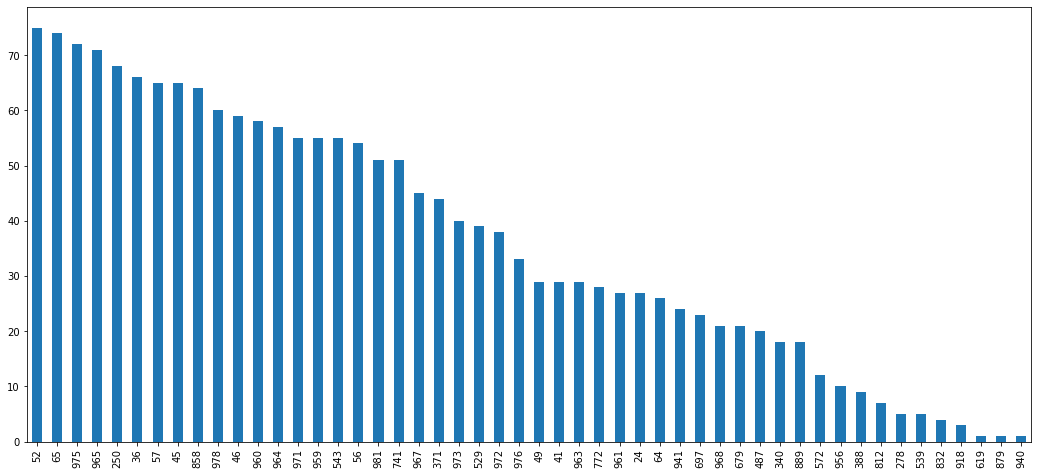

In [82]:
# visualize low access user ids and visualize via bar graph
df[(df.index < df.end_date) & 
   (df.index > df.start_date) & 
   (df.name!='Staff')].user_id.value_counts().tail(50).plot.bar(figsize=(18,8))

In [132]:
# save index of low access users
low_access = df[(df.index < df.end_date) & 
   (df.index > df.start_date) & 
   (df.name != 'Staff')].user_id.value_counts().tail(50).index.to_list()

In [197]:
# create df holding mostly 'inactive' active students
low_access_df = df.loc[df['user_id'].isin(low_access)]
low_access_df = low_access_df[low_access_df.name != 'Staff']
low_access_df.head(3)

,date,time,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-26 11:24:17,2018-01-26,11:24:17,24,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,...,Friday,January,appendix,None,None,None,None,None,None,None
2018-01-26 11:24:29,2018-01-26,11:24:29,24,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,...,Friday,January,appendix,capstone-workbook,None,None,None,None,None,None
2018-01-26 12:33:51,2018-01-26,12:33:51,36,21.0,97.105.19.61,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,...,Friday,January,,,None,None,None,None,None,None


In [148]:
low_access_df.describe()

,user_id,cohort_id,program_id,hour
count,8345.000000,8318.000000,8318.000000,8345.000000
mean,177.998682,23.469945,1.470666,13.069742
std,288.641127,40.406957,0.514354,3.266147
min,24.000000,1.000000,1.000000,0.000000
25%,56.000000,1.000000,1.000000,10.000000
50%,64.000000,1.000000,1.000000,13.000000
75%,64.000000,21.000000,2.000000,15.000000
max,981.000000,139.000000,3.000000,23.000000


<AxesSubplot:xlabel='hour'>

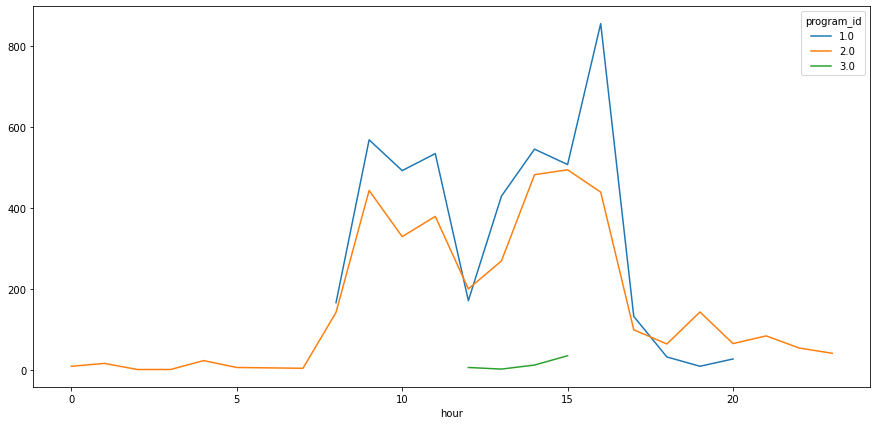

In [177]:
low_access_df.groupby('program_id').hour.value_counts().unstack(0).plot(figsize=(15,7))

Text(0, 0.5, 'Count')

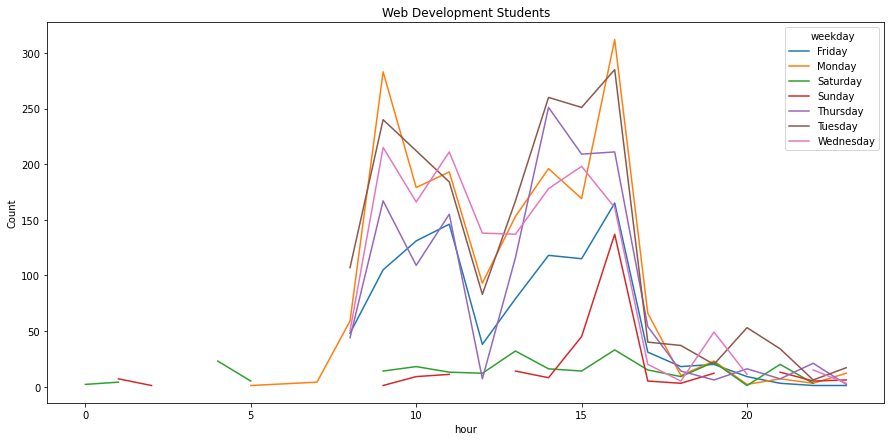

In [192]:
low_access_df[low_access_df.program_id != 3].groupby('weekday').hour.value_counts().unstack(0).plot(figsize=(15,7))
plt.title('Web Development Students')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

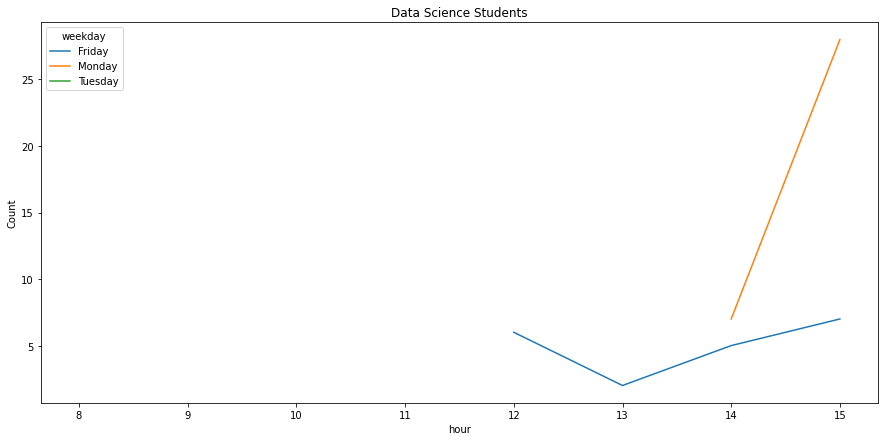

In [193]:
low_access_df[low_access_df.program_id == 3].groupby('weekday').hour.value_counts().unstack(0).plot(figsize=(15,7))
plt.title('Data Science Students')
plt.ylabel('Count')

#### Takeaways:

- The only programs that have the mostily inactive active students are PHP, Java, and Data Sceince.
- Data Science students are mostly active
    - the less active students accessed curriculum at around 12 to 3 pm
    - they were only active during Monday, Tuesday, and Friday
- The less active WebDev students followed the same patterns and had the most activity during school hours
    - mostly active on weekdays
    - mostly active during the beginning and end of class

### 5. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [204]:
# create df holding grad students accessing curriculum
grad_df = df1[
    (df1.index > df1.end_date)
    & 
    (df1.name != 'Staff')
]
grad_df.head()

,date,time,path,user_id,cohort_id,ip,name,slack,start_date,end_date,...,weekday,month,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Friday,January,java-ii,None,None,None,None,None,None,None
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Friday,January,java-ii,object-oriented-programming,None,None,None,None,None,None
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,...,Friday,January,slides,object_oriented_programming,None,None,None,None,None,None
2018-01-26 10:14:51,2018-01-26,10:14:51,javascript-i,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,...,Friday,January,javascript-i,None,None,None,None,None,None,None
2018-01-26 10:15:02,2018-01-26,10:15:02,javascript-i/functions,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,...,Friday,January,javascript-i,functions,None,None,None,None,None,None


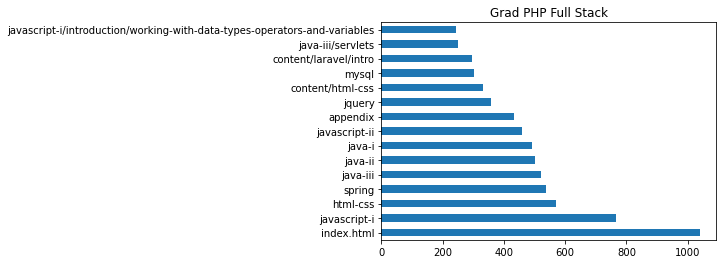

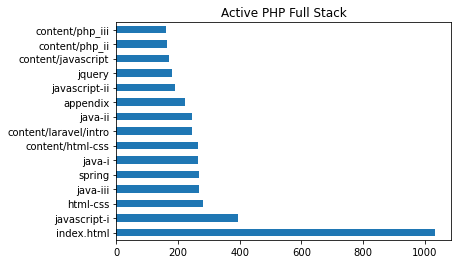

In [242]:
grad_df[grad_df.program_id==1].path.value_counts().head(15).plot.barh()
plt.title('Grad PHP Full Stack')
plt.show()

df1[(df1.created_at <= df1.end_date) & (df1.name!='Staff') & (df1.program_id==1)].path.value_counts().head(15).plot.barh()
plt.title('Active PHP Full Stack')
plt.show()

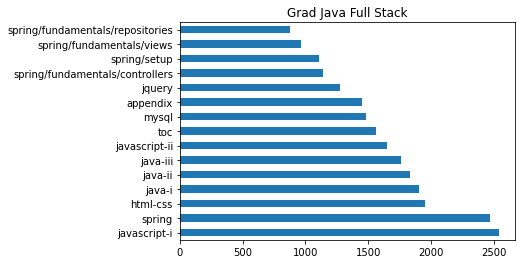

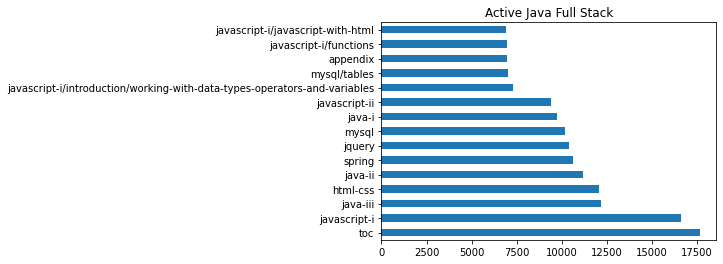

In [241]:
grad_df[grad_df.program_id==2].path.value_counts().head(15).plot.barh()
plt.title('Grad Java Full Stack')
plt.show()

df1[(df1.created_at <= df1.end_date) & (df1.name!='Staff') & (df1.program_id==2)].path.value_counts().head(15).plot.barh()
plt.title('Active Java Full Stack')
plt.show()

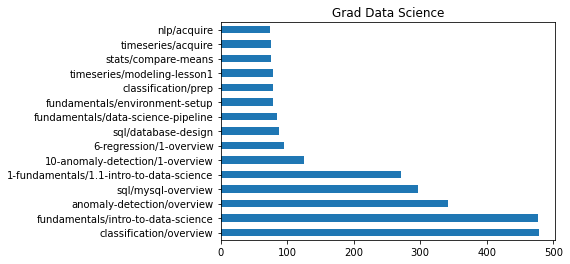

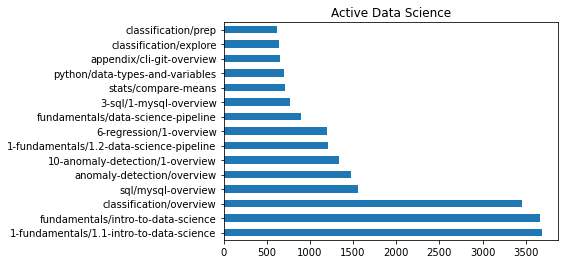

In [240]:
grad_df[grad_df.program_id==3].path.value_counts().head(15).plot.barh()
plt.title('Grad Data Science')
plt.show()

df1[(df1.created_at <= df1.end_date) & (df1.name!='Staff') & (df1.program_id==3)].path.value_counts().head(15).plot.barh()
plt.title('Active Data Science')
plt.show()

#### Takeaways:
Since Front End only had 1 cohort, i ignored that program for this exercise.

- Web Development programs appeared to have the same lessons looked over by grad and active students with slight variations in the number of requests each module received
    - PHP grad students looked into php modules more than the active students
    - Java grad students appeared to look into the spring module more than active students
- Graduate Data Science geared away from the fundamentals and looked more into machine learning overviews